<a href="https://colab.research.google.com/github/spatank/CIS-700/blob/master/Project/networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drive Initialization and Imports

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/Drive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/Drive


In [0]:
import os
os.chdir('Drive/My Drive/CIS-700')

In [3]:
!ls Data/

hpff_dp_narrative_chains_counts_clusters.txt
hpff_dp_narrative_chains_counts_NNPs.txt
hpff_sr_narrative_chains_counts_clusters_large.txt
hpff_sr_narrative_chains_counts_clusters.txt
hpff_sr_narrative_chains_counts_NNPs_large.txt
hpff_sr_narrative_chains_counts_NNPs.txt


In [4]:
import util

import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
from nltk.util import ngrams

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from textblob import TextBlob # for sentiment analysis

import networkx as nx

import scipy.io as sio

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Semantic Role Labeling

In [5]:
# data_path = 'Data/hpff_sr_narrative_chains_counts_clusters.txt'
data_path = 'Data/hpff_sr_narrative_chains_counts_NNPs_large.txt'
data = util.load_json(data_path)
# for cluster, narrative_chains in data.items(): 
#     print(cluster) 
#     for chain in narrative_chains: 
#         print(chain)

File Path:  Data/hpff_sr_narrative_chains_counts_NNPs_large.txt


In [0]:
all_verbs = []
verbs_dict = {}
for cluster, narrative_chains in data.items(): 
  tag = nltk.tag.pos_tag([cluster])[0][1] # get cluster tag
  if tag in ['NN', 'NNP', 'NNS']: # filter for noun phrases
    cluster_verbs = []
    for chain in narrative_chains:
      if len(chain) != 1:
        for elem in chain:
          if elem[0] == 'B-V':
            verb = lemmatizer.lemmatize(elem[1], 'v') 
            # provide explicit verb tag to lemmatizer,
            # otherwise it presumes a noun tag
            all_verbs.append(verb)
            cluster_verbs.append(verb)
    if len(cluster_verbs) != 1:
      # a single verb in a chain likely indicates noise, and
      # is also not a chain
      verbs_dict[cluster] = cluster_verbs

verbs_dict = {k: v for k, v in verbs_dict.items() if len(v) != 0} 
# remove lists of verbs that are empty from the dictionary

In [7]:
c = Counter(all_verbs)
print(c)

Counter({'be': 16597, 'know': 5378, 'say': 4494, 'go': 3904, 'get': 3476, 'have': 3449, 'think': 3330, 'leave': 2870, 'tell': 2451, 'look': 2409, 'walk': 2222, 'make': 2190, 'love': 2150, 'turn': 1891, 'take': 1881, 'hope': 1788, 'smile': 1766, 'Thank': 1743, 'want': 1733, 'do': 1629, "'m": 1472, 'fell': 1434, 'see': 1426, 'come': 1381, 'find': 1320, 'read': 1319, 'review': 1287, 'hear': 1206, 'felt': 1187, 'like': 1153, 'give': 1148, 'try': 1127, 'write': 1010, 'start': 970, 'kiss': 955, 'let': 932, 'run': 932, 'need': 930, 'feel': 906, 'thank': 904, "'s": 880, 'stand': 841, 'sit': 840, 'watch': 813, 'Hope': 811, 'begin': 810, 'forget': 808, 'help': 798, 'close': 781, 'laugh': 778, 'put': 757, 'wait': 756, 'appreciate': 749, 'head': 748, 'pull': 737, 'sleep': 720, 'follow': 720, 'ask': 716, 'nod': 698, 'enjoy': 694, 'whisper': 691, 'keep': 661, 'wonder': 632, 'fall': 611, 'saw': 604, 'hop': 571, 'hold': 564, 'change': 560, 'continue': 560, 'stop': 559, 'decide': 540, 'promise': 517, '

In [8]:
len(all_verbs)

180382

In [9]:
len(np.unique(all_verbs))

5104

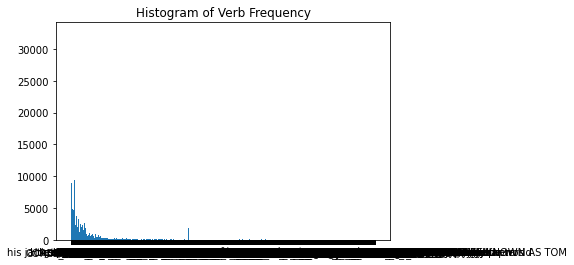

In [10]:
plt.hist(all_verbs, bins = 'auto')  
plt.title("Histogram of Verb Frequency")
plt.show()

In [0]:
# verbs_dict contains verbs associated with each character
verbs_dict
sentiment_dict = {}

for character, verbs in verbs_dict.items():
  character_sentiment = []
  for verb in verbs:
    verb_blob = TextBlob(verb)
    for verb_blob_sentence in verb_blob.sentences:
      character_sentiment.append(verb_blob_sentence.sentiment.polarity)
  sentiment_dict[character] = np.mean(character_sentiment)

In [18]:
sentiment_dict['Harry']

0.012116844575177907

In [19]:
sentiment_dict['Ron']

0.013870442459863115

In [20]:
sentiment_dict['Hermione']

0.01450327703984011

In [21]:
sentiment_dict['Draco']

0.014522448747970419

In [22]:
sentiment_dict['Voldemort']

0.0017670250896057347

In [12]:
# print(all_verbs)

['know', 'lug', 'bother', 'go', 'want', 'know', 'm', 'look', 'have', 'smile', 'post', 'leave', 'promise', 'update', 'get', 'know', 'COREF_CLUSTER_77', 'deserve', 'try', 'finish', 'look', 'realize', 'pack', 'sigh', 'get', 'pack', 'give', 'continue', 'walk', 'manage', 'make', 'think', 'think', 'want', 'deal', 'nod', 'sleep', 'stomp', 'be', 'say', 'stay', 'force', 'fell', 'love', 'hear', 'want', 'tell', 'hat', 'want', 'walk', 'leave', 'abandon', 'come', 'need', 'continue', 'have', 'say', 'plan', 'get', 'give', 'wonder', 'sympathize', 'involve', 'like', 'read', 'run', 'turn', 'run', 'slam', 'close', "'m", 'hear', 'get', 'promise', "'m", 'update', 'say', 'write', 'tell', 'can', 'be', 'lose', 'gain', 'delete', 'add', 'know', 'be', 'look', 'wake', 'know', 'imagine', 'lean', 'fell', 'get', 'be', 'go', 'have', 'drift', 'think', 'be', 'felt', 'say', 'feel', 'know', 'need', 'smile', 'fell', "'s", 'be', 'get', 'hope', 'hate', 'continue', 'read', 'post', 'get', 'saw', 'make', 'walk', 'step', 'say',

In [0]:
g_global = nx.DiGraph()
g_global.add_nodes_from(np.unique(all_verbs))

for character, verbs in verbs_dict.items():
  edges_between = list(ngrams(verbs, 2))
  for edge in edges_between:
    from_node = edge[0]
    to_node = edge[1]
    if from_node == to_node:
      continue # skip a self-edge
    if g_global.has_edge(from_node, to_node):
      g_global[from_node][to_node]['weight'] += 1
    else:
      g_global.add_edge(from_node, to_node, weight = 1)

nx.write_graphml(g_global, 'global_verb_network_large.graphml')

A = nx.adjacency_matrix(g_global, nodelist = np.unique(all_verbs), weight = 'weight')
sio.savemat('global_A_large.mat', dict(A = A.todense()))

In [0]:
all_graphs = {}

for character, verbs in verbs_dict.items():
  g = nx.DiGraph()
  g.add_nodes_from(verbs)
  edges_between = list(ngrams(verbs, 2))
  for edge in edges_between:
    from_node = edge[0]
    to_node = edge[1]
    if from_node == to_node:
      continue # skip a self-edge
    if g.has_edge(from_node, to_node):
      g[from_node][to_node]['weight'] += 1
    else:
      g.add_edge(from_node, to_node, weight = 1)
  all_graphs[character] = g

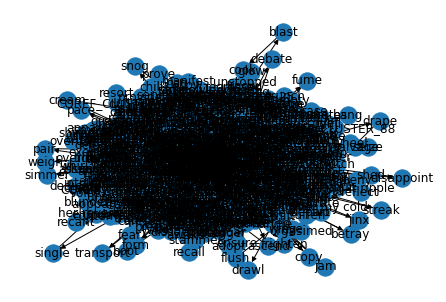

In [14]:
draco_graph = all_graphs['Draco']
nx.write_graphml(draco_graph, 'draco_verb_network_large.graphml')
nx.draw(draco_graph, with_labels = True)

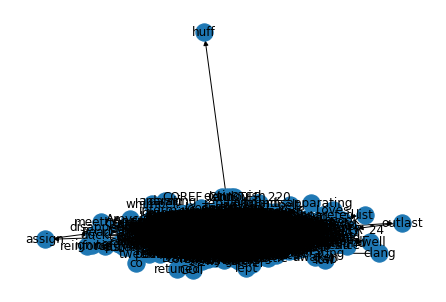

In [15]:
harry_graph = all_graphs['Harry']
nx.write_graphml(harry_graph, 'harry_verb_network_large.graphml')
nx.draw(harry_graph, with_labels = True)

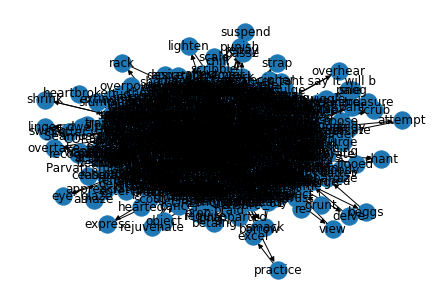

In [16]:
hermione_graph = all_graphs['Hermione']
nx.write_graphml(hermione_graph, 'hermione_verb_network_large.graphml')
nx.draw(hermione_graph, with_labels = True)

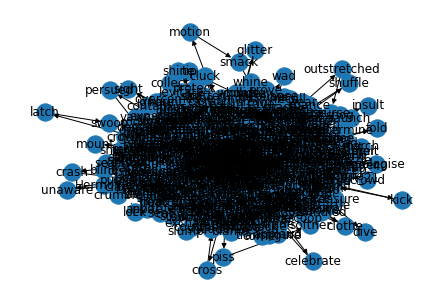

In [17]:
ron_graph = all_graphs['Ron']
nx.write_graphml(ron_graph, 'ron_verb_network_large.graphml')
nx.draw(ron_graph, with_labels = True)

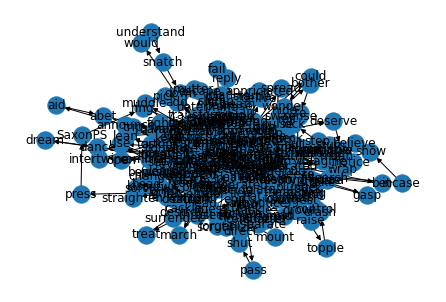

In [23]:
voldemort_graph = all_graphs['Voldemort']
nx.write_graphml(voldemort_graph, 'voldemort_verb_network_large.graphml')
nx.draw(voldemort_graph, with_labels = True)